In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
116417,2020-05-05,Evangeline,Louisiana,22039.0,63,1
70087,2020-04-18,Richland,Wisconsin,55103.0,8,1
156180,2020-05-18,Logan,Ohio,39091.0,24,0
138030,2020-05-12,Moore,North Carolina,37125.0,110,9
58788,2020-04-14,San Augustine,Texas,48405.0,9,1
139422,2020-05-13,San Mateo,California,6081.0,1533,66
94050,2020-04-27,Sherman,Nebraska,31163.0,1,0
421124,2020-08-10,Greensville,Virginia,51081.0,495,11
84304,2020-04-24,Moffat,Colorado,8081.0,6,0
335208,2020-07-15,Towns,Georgia,13281.0,71,1


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
153920,2020-05-17,Albemarle,Virginia,51003.0,138,4,2.0,2.57
359994,2020-07-22,Charlottesville city,Virginia,51540.0,371,8,4.0,7.57
299416,2020-07-03,Albemarle,Virginia,51003.0,420,9,8.0,6.57
211931,2020-06-05,Albemarle,Virginia,51003.0,217,8,4.0,5.29
293118,2020-07-01,Charlottesville city,Virginia,51540.0,216,4,4.0,4.86
366407,2020-07-24,Charlottesville city,Virginia,51540.0,405,8,20.0,10.29
261660,2020-06-21,Albemarle,Virginia,51003.0,334,8,13.0,6.86
331169,2020-07-13,Albemarle,Virginia,51003.0,563,10,11.0,13.71
169074,2020-05-22,Charlottesville city,Virginia,51540.0,74,2,2.0,0.43
123979,2020-05-07,Charlottesville city,Virginia,51540.0,65,2,1.0,1.29


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
1364,".Murray County, Minnesota",8194.0,Murray,Minnesota
1706,".Kimball County, Nebraska",3632.0,Kimball,Nebraska
683,".Stephenson County, Illinois",44498.0,Stephenson,Illinois
1782,".Hudson County, New Jersey",672391.0,Hudson,New Jersey
2295,".Pike County, Pennsylvania",55809.0,Pike,Pennsylvania
1646,".Sweet Grass County, Montana",3737.0,Sweet Grass,Montana
3060,".Dodge County, Wisconsin",87839.0,Dodge,Wisconsin
1415,".Copiah County, Mississippi",28065.0,Copiah,Mississippi
272,".Huerfano County, Colorado",6897.0,Huerfano,Colorado
1348,".Kittson County, Minnesota",4298.0,Kittson,Minnesota


In [22]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [23]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
136,2020-08-04,Albemarle,Virginia,51003.0,790,14,15.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
137,2020-08-05,Albemarle,Virginia,51003.0,791,16,1.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
138,2020-08-06,Albemarle,Virginia,51003.0,798,16,7.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
139,2020-08-07,Albemarle,Virginia,51003.0,817,16,19.0,11.71,".Albemarle County, Virginia",109330.0,10.710692
140,2020-08-08,Albemarle,Virginia,51003.0,833,16,16.0,13.14,".Albemarle County, Virginia",109330.0,12.018659
141,2020-08-09,Albemarle,Virginia,51003.0,838,16,5.0,11.43,".Albemarle County, Virginia",109330.0,10.454587
142,2020-08-10,Albemarle,Virginia,51003.0,842,16,4.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
143,2020-08-11,Albemarle,Virginia,51003.0,848,16,6.0,8.29,".Albemarle County, Virginia",109330.0,7.582548
144,2020-08-12,Albemarle,Virginia,51003.0,856,16,8.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
145,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14,".Albemarle County, Virginia",109330.0,9.274673


In [24]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
286,2020-08-04,Charlottesville city,Virginia,51540.0,504,13,9.0,9.00,".Charlottesville city, Virginia",47266.0,19.041171
287,2020-08-05,Charlottesville city,Virginia,51540.0,504,13,0.0,8.71,".Charlottesville city, Virginia",47266.0,18.427622
288,2020-08-06,Charlottesville city,Virginia,51540.0,505,15,1.0,7.71,".Charlottesville city, Virginia",47266.0,16.311937
289,2020-08-07,Charlottesville city,Virginia,51540.0,520,15,15.0,7.71,".Charlottesville city, Virginia",47266.0,16.311937
290,2020-08-08,Charlottesville city,Virginia,51540.0,537,15,17.0,9.43,".Charlottesville city, Virginia",47266.0,19.950916
291,2020-08-09,Charlottesville city,Virginia,51540.0,542,15,5.0,9.00,".Charlottesville city, Virginia",47266.0,19.041171
292,2020-08-10,Charlottesville city,Virginia,51540.0,543,15,1.0,6.86,".Charlottesville city, Virginia",47266.0,14.513604
293,2020-08-11,Charlottesville city,Virginia,51540.0,546,15,3.0,6.00,".Charlottesville city, Virginia",47266.0,12.694114
294,2020-08-12,Charlottesville city,Virginia,51540.0,550,15,4.0,6.57,".Charlottesville city, Virginia",47266.0,13.900055
295,2020-08-13,Charlottesville city,Virginia,51540.0,554,15,4.0,7.00,".Charlottesville city, Virginia",47266.0,14.809800


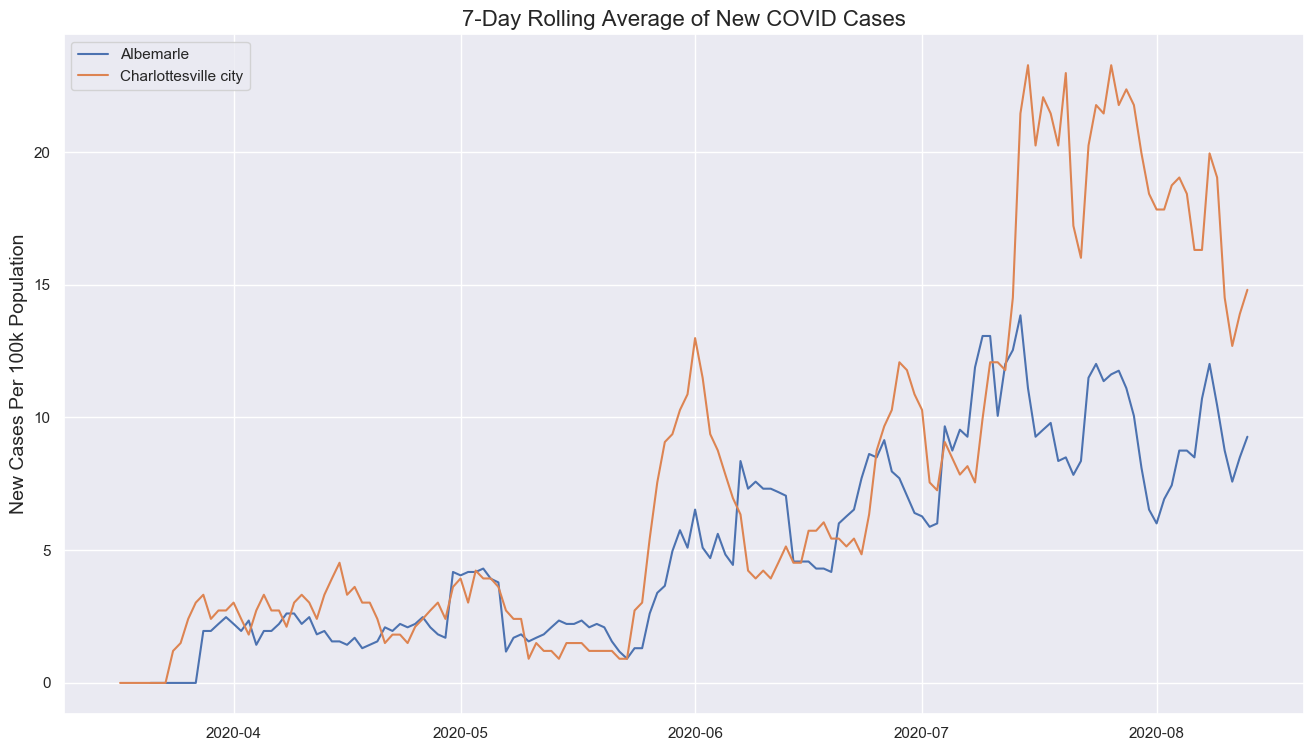

In [25]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.show()
fig.savefig('covidplot.png')